# S2 Histograms

In [1]:
import requests

url = 'https://raw.githubusercontent.com/sbu-python-summer/python-tutorial/master/day-3/sample.txt'
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    with open('histogram.txt', 'w') as file:
        file.write(response.text)
    print('File downloaded successfully.')
else:
    print(f'Failed to download file. Status code: {response.status_code}')

File downloaded successfully.


In [3]:
import numpy as np

index, value = np.loadtxt('histogram.txt', unpack=True)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88. 89.
 90. 91. 92. 93. 94. 95. 96. 97. 98. 99.]


[-30.58842789 -23.67009726 -16.75176662  -9.83343599  -2.91510536
   4.00322527  10.9215559   17.83988653  24.75821717  31.6765478
  38.59487843]


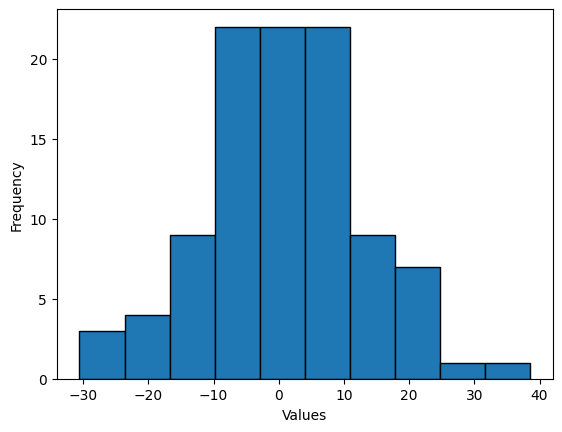

In [8]:
hist, bin_edges = np.histogram(value, bins=10) #hist contiene il numero di conteggi in ogni bin

import matplotlib.pyplot as plt

print(bin_edges)

plt.hist(value, bins=10, edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

In [14]:
bin_centers = np.zeros(len(hist))
for i in range(len(hist)):
    bin_centers[i] = (bin_edges[i] + bin_edges[i+1]) /2
    print("(", bin_centers[i], ",", hist[i], ")\n")

( -27.129262572005736 , 3 )

( -20.21093194037355 , 4 )

( -13.29260130874136 , 9 )

( -6.374270677109173 , 22 )

( 0.5440599545230143 , 22 )

( 7.462390586155202 , 22 )

( 14.38072121778739 , 9 )

( 21.299051849419577 , 7 )

( 28.217382481051764 , 1 )

( 35.135713112683945 , 1 )



# S4 Bootstrap

In [15]:
import numpy as np

# Gaussian parameters
mean = 0  
std_dev = 1  
length = 5000 

# Generate the 1D array
gaussian_array = np.random.normal(mean, std_dev, length)

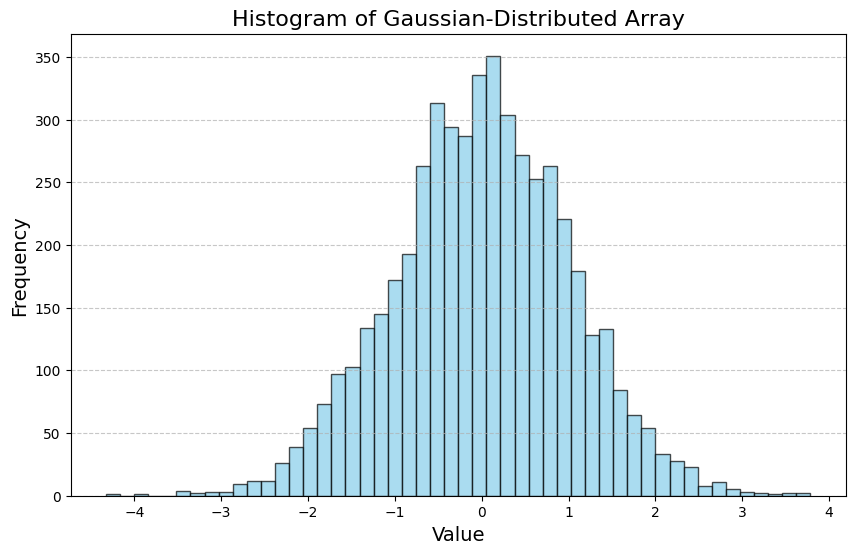

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(gaussian_array, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Histogram of Gaussian-Distributed Array", fontsize=16)
plt.xlabel("Value", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [31]:
# Generate 500 additional random numbers
additional_numbers = np.random.uniform(-5, 5, 500)

updated_array = np.append(gaussian_array, additional_numbers)

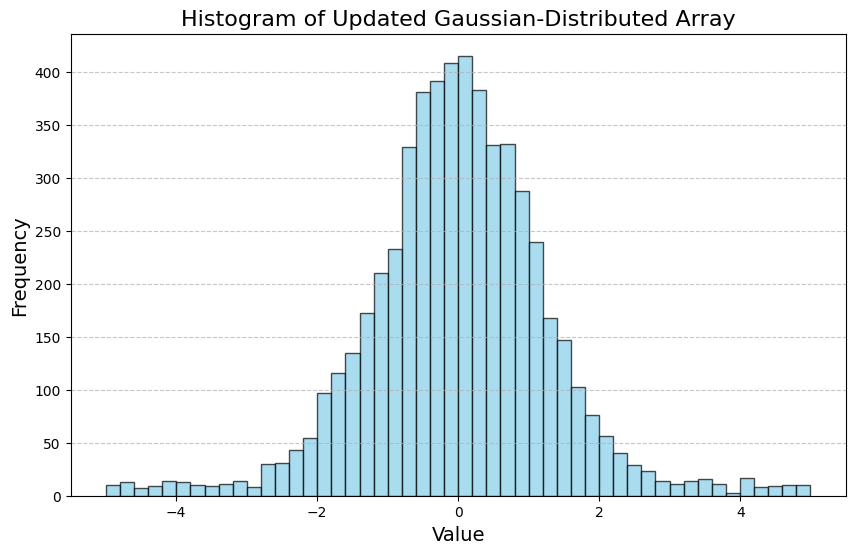

In [32]:
plt.figure(figsize=(10, 6))
plt.hist(updated_array, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Histogram of Updated Gaussian-Distributed Array", fontsize=16)
plt.xlabel("Value", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Use the bootstrap technique to create the mean distribution of the array

In [33]:
num_bootstrap_samples = 1000  
sample_size = len(updated_array)  
mean_distribution = []

for _ in range(num_bootstrap_samples):
    bootstrap_sample = np.random.choice(updated_array, size=sample_size, replace=True)
    sample_mean = np.mean(bootstrap_sample)
    mean_distribution.append(sample_mean)

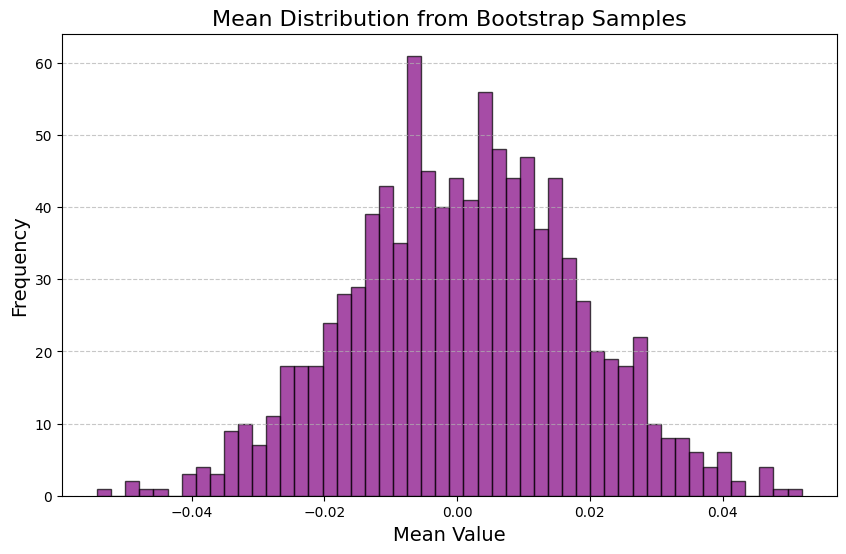

In [34]:
plt.figure(figsize=(10, 6))
plt.hist(mean_distribution, bins=50, color='purple', edgecolor='black', alpha=0.7)
plt.title("Mean Distribution from Bootstrap Samples", fontsize=16)
plt.xlabel("Mean Value", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [35]:
confidence_level = 0.95 

lower_percentile = (1 - confidence_level) / 2 * 100
upper_percentile = (1 + confidence_level) / 2 * 100

confidence_interval = np.percentile(mean_distribution, [lower_percentile, upper_percentile])

print(f"{confidence_level*100:.0f}% Confidence Interval of the Mean: {confidence_interval}")

95% Confidence Interval of the Mean: [-0.03298465  0.034598  ]
